In [1]:
import torch 
import torch.nn as nn

### The Transformer Block

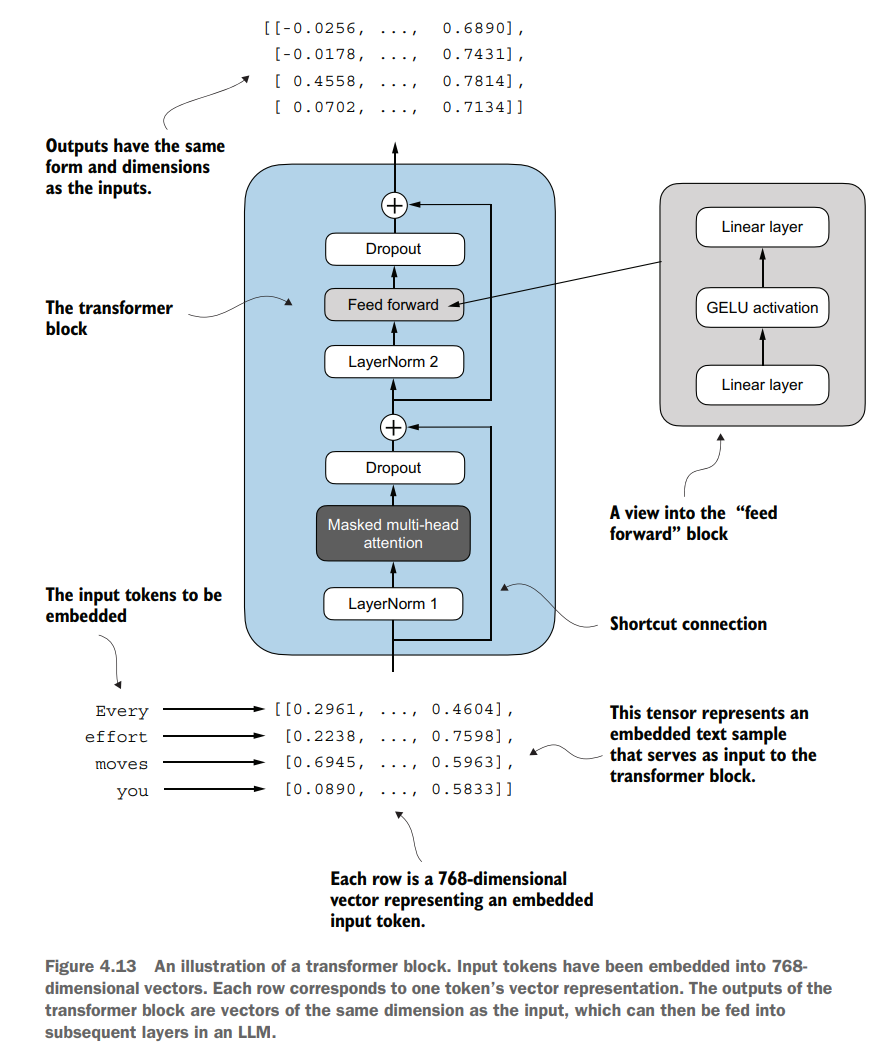

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from utils.attention import MultiHeadAttention
from utils.feedforward import FeedForward
from utils.layernorm import LayerNorm

When a transformer block processes an input sequence, each element in the sequence (for example, a word or subword token) is represented by a fixed-size vector (in this case, 768 dimensions). The operations within the transformer block, including multi-head attention and feed forward layers, are designed to transform these vectors in a way that **preserves their dimensionality**. This fact helps us **scale the transformer blocks** by stacking them which we will later.

The idea is that the self-attention mechanism in the multi-head attention block identifies and analyzes relationships between elements in the input sequence. 

In contrast, the feed forward network modifies the data individually at each position. This combination not only enables a more nuanced understanding and processing of the input but also enhances the model’s overall capacity for handling complex data patterns.


In [3]:
help(MultiHeadAttention)

Help on class MultiHeadAttention in module utils.attention:

class MultiHeadAttention(torch.nn.modules.module.Module)
 |  MultiHeadAttention(d_in, d_out, context_length, dropout, num_heads, qkv_bias=False)
 |
 |  Method resolution order:
 |      MultiHeadAttention
 |      torch.nn.modules.module.Module
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False)
 |      Initialize internal Module state, shared by both nn.Module and ScriptModule.
 |
 |  forward(self, x)
 |      Step 1
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  __annotations__ = {}
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from torch.nn.modules.module.Module:
 |
 |  __call__ = _wrapped_call_impl(self, *args, **kwargs)
 |
 |  __delattr__(self, name)
 |      Implement delattr(self, name).
 |
 |  __dir__(

In [4]:
help(LayerNorm)

Help on class LayerNorm in module utils.layernorm:

class LayerNorm(torch.nn.modules.module.Module)
 |  LayerNorm(emb_dim)
 |
 |  Method resolution order:
 |      LayerNorm
 |      torch.nn.modules.module.Module
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, emb_dim)
 |      Initialize internal Module state, shared by both nn.Module and ScriptModule.
 |
 |  forward(self, x)
 |      Define the computation performed at every call.
 |
 |      Should be overridden by all subclasses.
 |
 |      .. note::
 |          Although the recipe for forward pass needs to be defined within
 |          this function, one should call the :class:`Module` instance afterwards
 |          instead of this since the former takes care of running the
 |          registered hooks while the latter silently ignores them.
 |
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |
 |  __annotations__ = {}
 |
 |  -----------

In [ ]:
class TransformerBlock(nn.Module):

    def __init__(self, config):
        super().__init__()

        self.att = MultiHeadAttention(
            d_in = config["emb_dim"],
            d_out = config["emb_dim"],
            context_length = config["context_length"],
            num_heads = config["n_heads"],
            dropout = config["drop_rate"],
            qkv_bias = config["qkv_bias"],
        )

        self.ff = FeedForward(config)

        self.norm1 = LayerNorm(config["emb_dim"])

        self.norm2 = LayerNorm(config["emb_dim"])

        self.drop_shortcut = nn.Dropout(config["drop_rate"])

    def forward(self, x):
        
        shortcut = x # Shortcut connection for attention block
        x = self.norm1(x) # Normalize the embedding vectors
        x = self.att(x) # Get context vectors of Shape [batch_size, num_tokens, emb_dim] 
        x = self.drop_shortcut(x) # dropout layer

        x = x + shortcut # Add the original input back

        shortcut = x # Shortcut connection for feedforward block
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut

        return x



In [6]:
GPT_CONFIG_124M = {
 "vocab_size": 50257, # Vocabulary size
 "context_length": 1024, # Context length
 "emb_dim": 768, # Embedding dimension
 "n_heads": 12, # Number of attention heads
 "n_layers": 12, # Number of layers
 "drop_rate": 0.1, # Dropout rate
 "qkv_bias": False # Query-Key-Value bias
}



torch.manual_seed(123)
x = torch.rand(2, 4, 768) 
block = TransformerBlock(GPT_CONFIG_124M)
output = block(x)
print("Input shape:", x.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 4, 768])
Output shape: torch.Size([2, 4, 768])
